In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ltdataset/LTF Challenge data with dictionary.xlsx


# * Loading Training Dataset

In [2]:
train_df = pd.read_excel('/kaggle/input/ltdataset/LTF Challenge data with dictionary.xlsx', sheet_name = 'TrainData')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47970 entries, 0 to 47969
Columns: 105 entries, FarmerID to Target_Variable/Total Income
dtypes: float64(62), int64(5), object(38)
memory usage: 38.4+ MB


In [4]:
num_cols = ((train_df.select_dtypes(include = [float,int])).columns).to_list()

In [5]:
len(num_cols)

67

In [6]:
cat_cols = ((train_df.select_dtypes(include = [object])).columns).to_list()

In [7]:
len(cat_cols)

38

In [8]:
cat_df = train_df[cat_cols].copy()

In [9]:
cat_df.shape

(47970, 38)

In [10]:
num_df = train_df[num_cols].copy()

In [11]:
num_df.shape

(47970, 67)

# printing for null values of numerical columns

In [12]:
for i in num_cols:
    if train_df[i].isnull().sum() > 0 :
        print(f"{i}: {train_df[i].isnull().sum()}")

Avg_Disbursement_Amount_Bureau: 20790
Total_Land_For_Agriculture: 71
Perc_of_house_with_6plus_room: 168
Women_15_19_Mothers_or_Pregnant_at_time_of_survey: 168
perc_of_pop_living_in_hh_electricity: 168
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms: 168
mat_roof_Metal_GI_Asbestos_sheets: 168
perc_of_Wall_material_with_Burnt_brick: 168
Households_with_improved_Sanitation_Facility: 168
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k: 168


# printing for null values of categorical columns

In [13]:
for i in cat_cols:
    if train_df[i].isnull().sum() > 0 :
        print(f"{i}: {train_df[i].isnull().sum()}")

Location: 17030
Address type: 17030
Ownership: 17030


In [14]:
# List of columns with missing values
columns_to_check = [
    'Perc_of_house_with_6plus_room',
    'Total_Land_For_Agriculture',
    'Women_15_19_Mothers_or_Pregnant_at_time_of_survey',
    'perc_of_pop_living_in_hh_electricity',
    'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
    'mat_roof_Metal_GI_Asbestos_sheets',
    'perc_of_Wall_material_with_Burnt_brick',
    'Households_with_improved_Sanitation_Facility',
    'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'
]

# Drop rows from df_cat where any of these columns have missing values
train_df = train_df.dropna(subset=columns_to_check)

In [15]:
print(train_df[columns_to_check].isnull().sum())
train_df.shape

Perc_of_house_with_6plus_room                                   0
Total_Land_For_Agriculture                                      0
Women_15_19_Mothers_or_Pregnant_at_time_of_survey               0
perc_of_pop_living_in_hh_electricity                            0
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms     0
mat_roof_Metal_GI_Asbestos_sheets                               0
perc_of_Wall_material_with_Burnt_brick                          0
Households_with_improved_Sanitation_Facility                    0
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k    0
dtype: int64


(47731, 105)

In [16]:
for i in num_cols:
    if train_df[i].isnull().sum() > 0 :
        print(f"{i}: {train_df[i].isnull().sum()}")

Avg_Disbursement_Amount_Bureau: 20684


In [17]:
for i in cat_cols:
    if train_df[i].isnull().sum() > 0 :
        print(f"{i}: {train_df[i].isnull().sum()}")

Location: 16900
Address type: 16900
Ownership: 16900


In [18]:
train_df = train_df.drop_duplicates()

In [19]:
train_df['Address type'].value_counts()

Address type
Permanent Address    26112
Current Address       3955
Both Addresses         762
Name: count, dtype: int64

In [20]:
train_df['Ownership'].value_counts()

Ownership
Owned       29365
Parental     1455
Rented          9
Name: count, dtype: int64

# trying to impute latitude & longitude according to district groupby

In [21]:
train_df[['Latitude','Longitude']] = train_df['Location'].str.split(',', expand = True).astype(float)

In [22]:
train_df['Latitude'].isnull().sum(), train_df['Longitude'].isnull().sum()

(16900, 16900)

In [23]:
district_coords = train_df.groupby('DISTRICT')[['Latitude', 'Longitude']].median().reset_index()
print(district_coords)

        DISTRICT   Latitude  Longitude
0       ADILABAD  19.497852  78.585499
1           AGRA  27.162271  78.048640
2      AHMADABAD  22.878851  72.061349
3     AHMADNAGAR  19.246990  74.691184
4          AKOLA  20.696728  77.017054
..           ...        ...        ...
393      YADADRI  17.501106  78.891752
394       YADGIR  16.702703  77.002411
395  YAMUNANAGAR  30.387162  77.420521
396     YAVATMAL  20.194987  77.840233
397          YSR  14.271768  78.729071

[398 rows x 3 columns]


In [24]:
train_df.columns

Index(['FarmerID', 'State', 'REGION', 'SEX', 'CITY', 'Zipcode', 'DISTRICT',
       'VILLAGE', 'MARITAL_STATUS', 'Location',
       ...
       'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020',
       ' Night light index',
       ' Village score based on socio-economic parameters (Non normalised)',
       ' Village score based on socio-economic parameters (0 to 100)',
       ' Village category based on socio-economic parameters (Good, Average, Poor)',
       ' Land Holding Index source (Total Agri Area/ no of people)',
       ' Road density (Km/ SqKm)', 'Target_Variable/Total Income', 'Latitude',
       'Longitude'],
      dtype='object', length=107)

In [25]:
# Merge median coordinates back into the original DataFrame
train_df = train_df.merge(district_coords, on='DISTRICT', how='left', suffixes=('', '_median'))

# Fill missing values
train_df['Latitude'] = train_df['Latitude'].fillna(train_df['Latitude_median'])
train_df['Longitude'] = train_df['Longitude'].fillna(train_df['Longitude_median'])

# Drop temporary columns
train_df.drop(['Latitude_median', 'Longitude_median'], axis=1, inplace=True)

In [26]:
train_df['Longitude'].isnull().sum(), train_df['Latitude'].isnull().sum()

(8, 8)

In [27]:
train_df['Latitude'] = train_df['Latitude'].ffill()
train_df['Longitude'] = train_df['Longitude'].ffill()

In [28]:
train_df['Longitude'].isnull().sum(), train_df['Latitude'].isnull().sum()

(0, 0)

In [29]:
train_df[['K022-Ambient temperature min','K022-Ambient temperature max']] = train_df['K022-Ambient temperature (min & max)'].str.split('/', expand = True).astype(float)
train_df[['R022-Ambient temperature min','R022-Ambient temperature max']] = train_df['R022-Ambient temperature (min & max)'].str.split('/', expand = True).astype(float)
train_df[['K021-Ambient temperature min','K021-Ambient temperature max']] = train_df['K021-Ambient temperature (min & max)'].str.split('/', expand = True).astype(float)
train_df[['R021-Ambient temperature min','R021-Ambient temperature max']] = train_df['R021-Ambient temperature (min & max)'].str.split('/', expand = True).astype(float)
train_df[['R020-Ambient temperature min','R020-Ambient temperature max']] = train_df['R020-Ambient temperature (min & max)'].str.split('/', expand = True).astype(float)

In [30]:
train_df.drop(columns = ['K022-Ambient temperature (min & max)','R022-Ambient temperature (min & max)','K021-Ambient temperature (min & max)','R021-Ambient temperature (min & max)','R020-Ambient temperature (min & max)'], inplace = True)

In [31]:
train_df['Kharif Seasons  Type of water bodies in hectares 2022'].value_counts()

Kharif Seasons  Type of water bodies in hectares 2022
[None]                             29063
['water']                           7960
['river']                           3549
['reservoir, water']                2450
['reservoir']                       2386
['riverbank']                        910
['river, water']                     653
['reservoir, river']                 163
['reservoir, river, water']          122
['reservoir, riverbank, water']       96
['river, riverbank']                  96
['water, wetland']                    72
['river, riverbank, water']           49
['wetland']                           39
['river, wetland']                    31
['riverbank, water']                  26
['riverbank, wetland']                24
['reservoir, wetland']                17
['reservoir, water, wetland']         15
['river, water, wetland']              4
['river, riverbank, wetland']          3
['reservoir, river, riverbank']        1
Name: count, dtype: int64

In [32]:
train_df['Rabi Seasons Type of water bodies in hectares 2022'].value_counts()

Rabi Seasons Type of water bodies in hectares 2022
[None]                             29063
['water']                           7960
['river']                           3549
['reservoir, water']                2450
['reservoir']                       2386
['riverbank']                        910
['river, water']                     653
['reservoir, river']                 163
['reservoir, river, water']          122
['reservoir, riverbank, water']       96
['river, riverbank']                  96
['water, wetland']                    72
['river, riverbank, water']           49
['wetland']                           39
['river, wetland']                    31
['riverbank, water']                  26
['riverbank, wetland']                24
['reservoir, wetland']                17
['reservoir, water, wetland']         15
['river, water, wetland']              4
['river, riverbank, wetland']          3
['reservoir, river, riverbank']        1
Name: count, dtype: int64

In [33]:
train_df['Rabi Seasons Type of water bodies in hectares 2021'].value_counts()

Rabi Seasons Type of water bodies in hectares 2021
[None]                             29063
['water']                           7960
['river']                           3549
['reservoir, water']                2450
['reservoir']                       2386
['riverbank']                        910
['river, water']                     653
['reservoir, river']                 163
['reservoir, river, water']          122
['reservoir, riverbank, water']       96
['river, riverbank']                  96
['water, wetland']                    72
['river, riverbank, water']           49
['wetland']                           39
['river, wetland']                    31
['riverbank, water']                  26
['riverbank, wetland']                24
['reservoir, wetland']                17
['reservoir, water, wetland']         15
['river, water, wetland']              4
['river, riverbank, wetland']          3
['reservoir, river, riverbank']        1
Name: count, dtype: int64

In [34]:
train_df['Kharif Seasons Type of water bodies in hectares 2021'].value_counts()

Kharif Seasons Type of water bodies in hectares 2021
[None]                             29063
['water']                           7960
['river']                           3549
['reservoir, water']                2450
['reservoir']                       2386
['riverbank']                        910
['river, water']                     653
['reservoir, river']                 163
['reservoir, river, water']          122
['reservoir, riverbank, water']       96
['river, riverbank']                  96
['water, wetland']                    72
['river, riverbank, water']           49
['wetland']                           39
['river, wetland']                    31
['riverbank, water']                  26
['riverbank, wetland']                24
['reservoir, wetland']                17
['reservoir, water, wetland']         15
['river, water, wetland']              4
['river, riverbank, wetland']          3
['reservoir, river, riverbank']        1
Name: count, dtype: int64

In [35]:
train_df['Kharif Seasons Type of water bodies in hectares 2020'].value_counts()

Kharif Seasons Type of water bodies in hectares 2020
[None]                             28638
['water']                           8419
['river']                           3279
['reservoir']                       2769
['reservoir, water']                2128
['riverbank']                       1016
['river, water']                     643
['reservoir, river']                 173
['reservoir, river, water']          149
['river, riverbank']                 115
['reservoir, riverbank, water']       96
['water, wetland']                    86
['wetland']                           59
['riverbank, water']                  46
['river, riverbank, water']           40
['riverbank, wetland']                19
['reservoir, wetland']                17
['reservoir, water, wetland']         15
['river, wetland']                    14
['river, water, wetland']              4
['river, riverbank, wetland']          3
['reservoir, river, riverbank']        1
Name: count, dtype: int64

In [36]:
train_df['Rabi Seasons Type of water bodies in hectares 2020'].value_counts()

Rabi Seasons Type of water bodies in hectares 2020
[None]                             29063
['water']                           7960
['river']                           3549
['reservoir, water']                2450
['reservoir']                       2386
['riverbank']                        910
['river, water']                     653
['reservoir, river']                 163
['reservoir, river, water']          122
['reservoir, riverbank, water']       96
['river, riverbank']                  96
['water, wetland']                    72
['river, riverbank, water']           49
['wetland']                           39
['river, wetland']                    31
['riverbank, water']                  26
['riverbank, wetland']                24
['reservoir, wetland']                17
['reservoir, water, wetland']         15
['river, water, wetland']              4
['river, riverbank, wetland']          3
['reservoir, river, riverbank']        1
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Parse safely and remove non-string items
def safe_parse(x):
    if pd.isna(x) or x in ['None', 'nan']:
        return []
    try:
        # Convert string representation of list into actual list
        items = eval(x)
        # Keep only string items, ignore None or numbers
        return [str(i) for i in items if isinstance(i, str)]
    except:
        return []

# Step 2: Apply to the column
train_df['WaterBodiesParsed'] = train_df['Rabi Seasons Type of water bodies in hectares 2020'].apply(safe_parse)

# Step 3: Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encoded = pd.DataFrame(
    mlb.fit_transform(train_df['WaterBodiesParsed']),
    columns=mlb.classes_,
    index=train_df.index
)

# Step 4: Concatenate with original DataFrame
train_df = pd.concat([train_df, encoded], axis=1)


In [38]:
columns_to_encode = [
    'Kharif Seasons  Type of water bodies in hectares 2022', 
    'Rabi Seasons Type of water bodies in hectares 2022',
    'Rabi Seasons Type of water bodies in hectares 2021', 
    'Kharif Seasons Type of water bodies in hectares 2021',
    'Rabi Seasons Type of water bodies in hectares 2020'
                    ]

In [39]:
train_df[columns_to_encode].nunique(axis=1).value_counts()

1    47729
Name: count, dtype: int64

In [40]:
columns_to_encode1 = ['Kharif Seasons  Type of soil in 2022', 'Rabi Seasons Type of soil in 2022',
'Rabi Seasons Type of soil in 2021', 'Kharif Seasons Type of soil in 2021',
 'Rabi Seasons Type of soil in 2020']
# 'Kharif Seasons Type of soil in 2020'

# checking whether above 6 columns has same entries across all rows

In [41]:
train_df[columns_to_encode1].nunique(axis=1).value_counts()

1    47729
Name: count, dtype: int64

# multilabel ordinal encoding to soil type

In [42]:
train_df['Kharif Seasons  Type of soil in 2022'].value_counts()

Kharif Seasons  Type of soil in 2022
Mixed Red and Black Soils                                               16418
Deep Black soils (with shallow and medium Black Soils as inclusion)     11725
Shallow Black Soils (with medium and deep Black Soils as  inclusion)    10237
Red loamy Soils                                                          4044
Red and lateritic Soils                                                  2179
Coastal and Deltaic Alluvium derived Soils                               1360
Alluvial-derived Soils (with saline phases)                               939
Desert (saline) Soils                                                     827
Name: count, dtype: int64

In [43]:
# Define the mapping based on fertility (higher number => more fertile, no 0)
soil_fertility_map = {
    'Alluvial-derived Soils (with saline phases)': 5,
    'Coastal and Deltaic Alluvium derived Soils': 5,
    'Deep Black soils (with shallow and medium Black Soils as inclusion)': 4,
    'Shallow Black Soils (with medium and deep Black Soils as  inclusion)': 4,
    'Mixed Red and Black Soils': 3,
    'Red loamy Soils': 2,
    'Red and lateritic Soils': 2,
    'Desert (saline) Soils': 1
}

# Apply the mapping
train_df['soil_fertility_label'] = train_df['Kharif Seasons  Type of soil in 2022'].map(soil_fertility_map)

In [44]:
train_df['soil_fertility_label'].isnull().sum()

0

In [45]:
#train_df.to_excel('LTF Challenge2.xlsx')

# ordinal label encoding Seasons  Agro Ecological Sub Zone

In [46]:
train_df['Kharif Seasons  Agro Ecological Sub Zone in 2022'].value_counts()

Kharif Seasons  Agro Ecological Sub Zone in 2022
CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND)  HOT SUBHUMID (DRY) ECO-REGION                          13437
DECCAN PLATU  HOT SEMI-ARID ECO-REGION                                                            10485
DECCAN PLATEAU  (TELANGANA) AND EASTERN GHATS  HOT SEMI ARID ECO-REGION                            8117
EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCAN (K ARNATAKA) PLATEAU  HOT SEMI-ARID ECO-REGION     4044
CENTRAL HIGHLANDS ( MALWA )  GUJARAT PLAIN AND KATHIAWAR PENINSULA  SEMI-ARID ECO-REGION           2933
NORTHERN PLAIN (AND CENTRAL HIGHLANDS) INCLUDING ARAVALLIS  HOT SEMI-ARID EGO-REGION               2631
EASTERN PLATEAU (CHHOTANAGPUR) AND EASTERN GHATS  HOT SUBHUMID ECO-REGION                          2021
KARNATAKA PLATEAU (RAYALSEEMA AS INCLUSION)                                                        1610
EASTERN COASTAL PLAIN  HOT SUBHUMID TO SEMI-ARID EGO-REGION                                        1360
WESTERN PLAIN  

In [47]:
# Mapping dictionary
agro_zone_fertility_map = {
    'WESTERN GHATS AND COASTAL PLAIN  HOT HUMID-PERHUMID ECO-REGION': 6,
    'EASTERN PLATEAU (CHHOTANAGPUR) AND EASTERN GHATS  HOT SUBHUMID ECO-REGION': 5,
    'EASTERN COASTAL PLAIN  HOT SUBHUMID TO SEMI-ARID EGO-REGION': 5,
    'CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND)  HOT SUBHUMID (DRY) ECO-REGION': 4,
    'NORTHERN PLAIN (AND CENTRAL HIGHLANDS) INCLUDING ARAVALLIS  HOT SEMI-ARID EGO-REGION': 3,
    'DECCAN PLATU  HOT SEMI-ARID ECO-REGION': 3,
    'DECCAN PLATEAU  (TELANGANA) AND EASTERN GHATS  HOT SEMI ARID ECO-REGION': 3,
    'EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCAN (K ARNATAKA) PLATEAU  HOT SEMI-ARID ECO-REGION': 3,
    'CENTRAL HIGHLANDS ( MALWA )  GUJARAT PLAIN AND KATHIAWAR PENINSULA  SEMI-ARID ECO-REGION': 3,
    'KARNATAKA PLATEAU (RAYALSEEMA AS INCLUSION)': 2,
    'WESTERN PLAIN  KACHCHH AND PART OF KATHIAWAR PENINSULA, HOT ARID ECO-REGION': 1,
    'NORTHERN PLAIN  HOT SUBHUMID (DRY) ECO-REGION': 4
}

# Apply encoding
train_df['agro_ecozone_encoded'] = train_df['Kharif Seasons  Agro Ecological Sub Zone in 2022'].map(agro_zone_fertility_map)


In [48]:
train_df['agro_ecozone_encoded'].isnull().sum()

0

In [49]:
train_df['Kharif Seasons  Agro Ecological Sub Zone in 2022'].isnull().sum()

0

# Trying to impute for ownership and address type

In [50]:
train_df['Address type'] = train_df['Address type'].fillna('Missing')
train_df['Ownership'] = train_df['Ownership'].fillna('Missing')

In [51]:
address_type = {
    'Current Address': 1,
    'Permanent Address': 2,
    'Both Addresses': 3,
    'Missing': 0   # lowest priority or unknown
}

ownership= {
    'Rented': 1,
    'Parental': 2,
    'Owned': 3,
    'Missing': 0   # lowest confidence
}

train_df['Address type_encoded'] = train_df['Address type'].map(address_type)
train_df['Ownership_encoded'] = train_df['Ownership'].map(ownership)

In [52]:
train_df['Address type_encoded'].isnull().sum(), train_df['Ownership_encoded'].isnull().sum()

(0, 0)

In [53]:
# dropping State ,REGION, CITY, DISTRICT, VILLAGE, K022-Nearest Mandi Name

In [54]:
train_df.drop(columns = ['State','REGION','CITY','DISTRICT','VILLAGE','K022-Nearest Mandi Name'], inplace = True)

In [55]:
mean_loan_by_sex = train_df.groupby('SEX')['Target_Variable/Total Income'].mean()

# doing encoding of sex column wrt what amount then got actaully wrt target column

In [56]:
mean_loan_by_sex

SEX
F    1.340907e+06
M    1.210387e+06
Name: Target_Variable/Total Income, dtype: float64

In [57]:
sex_category_encoding = {
                'F' : 1.32,
                'M' : 1.21
}
train_df['SEX_category_encoded'] = train_df['SEX'].map(sex_category_encoding)

In [58]:
train_df['MARITAL_STATUS'].value_counts()

MARITAL_STATUS
M    43972
S     3757
Name: count, dtype: int64

In [59]:
marital_status_encoding = {
                'M' : 2,
                'F' : 1
}
train_df['MARITAL_STATUS_encoded'] = train_df['MARITAL_STATUS'].map(marital_status_encoding)

In [60]:
train_df['MARITAL_STATUS_encoded'].value_counts()

MARITAL_STATUS_encoded
2.0    43972
Name: count, dtype: int64

In [61]:
train_df['K022-Village category based on Agri parameters (Good, Average, Poor)'].value_counts()

K022-Village category based on Agri parameters (Good, Average, Poor)
Poor       36327
Average    11402
Name: count, dtype: int64

In [62]:
K022_Village_category_based_on_Agri_encoding = {
                'Poor' : 1,
                'Average' : 2
}
train_df['K022_Village_category_based_on_Agri_parameters_(Good, Average, Poor)_encoded'] = train_df['K022-Village category based on Agri parameters (Good, Average, Poor)'].map(K022_Village_category_based_on_Agri_encoding)

In [63]:
R022_Village_category_based_on_Agri_encoding = {
                'Poor' : 1,
                'Average' : 2,
                'Good'    : 3
}
train_df['R022_Village_category_based_on_Agri_parameters_(Good, Average, Poor)_encoded'] = train_df['R022-Village category based on Agri parameters (Good, Average, Poor)'].map(R022_Village_category_based_on_Agri_encoding)

# not imputing Avg_Disbursement_Amount_Bureau because maybe customer has not taken loan

In [64]:
train_df['Avg_Disbursement_Amount_Bureau'].isnull().sum()

20683

In [65]:
train_df['Avg_Disbursement_Amount_Bureau'].fillna(0, inplace = True)

/tmp/ipykernel_82/2148742100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Avg_Disbursement_Amount_Bureau'].fillna(0, inplace = True)


In [66]:
train_df['MARITAL_STATUS_encoded'].fillna(1, inplace = True)

/tmp/ipykernel_82/1318401256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MARITAL_STATUS_encoded'].fillna(1, inplace = True)


In [67]:
train_df.drop(columns = ['Location','SEX','MARITAL_STATUS','Address type','Ownership','K022-Village category based on Agri parameters (Good, Average, Poor)','K022-Village category based on socio-economic parameters (Good, Average, Poor)','R022-Village category based on Agri parameters (Good, Average, Poor)','Kharif Seasons  Type of soil in 2022','Kharif Seasons  Type of water bodies in hectares 2022','Kharif Seasons  Agro Ecological Sub Zone in 2022','Rabi Seasons Type of soil in 2022','Rabi Seasons Type of water bodies in hectares 2022','Rabi Seasons Agro Ecological Sub Zone in 2022','Rabi Seasons Type of soil in 2021','Rabi Seasons Type of water bodies in hectares 2021','Rabi Seasons Agro Ecological Sub Zone in 2021','Kharif Seasons Type of soil in 2021','Kharif Seasons Type of water bodies in hectares 2021','Kharif Seasons Agro Ecological Sub Zone in 2021','Kharif Seasons Type of soil in 2020','Kharif Seasons Type of water bodies in hectares 2020','Kharif Seasons Agro Ecological Sub Zone in 2020','Rabi Seasons Type of soil in 2020','Rabi Seasons Type of water bodies in hectares 2020','Rabi Seasons Agro Ecological Sub Zone in 2020',' Village category based on socio-economic parameters (Good, Average, Poor)','WaterBodiesParsed'], inplace = True)

In [68]:
train_df.shape

(47729, 108)

In [69]:
num_cols1 = ((train_df.select_dtypes(include = [float,int])).columns).to_list()

In [70]:
train_df['Khariff_Ambient_temperature_AVG_min'] = (train_df['K022-Ambient temperature min'] + train_df['K021-Ambient temperature min'])*0.5
train_df['Rabi_Ambient_temperature_AVG_min'] = (train_df['R021-Ambient temperature min'] + train_df['R022-Ambient temperature min'] + train_df['R020-Ambient temperature min']) * 0.33 
train_df['Khariff_Ambient_temperature_AVG_max'] = (train_df['K022-Ambient temperature max'] + train_df['K021-Ambient temperature max']) * 0.5
train_df['Rabi_Ambient_temperature_AVG_max'] = (train_df['R021-Ambient temperature max'] + train_df['R022-Ambient temperature max'] + train_df['R020-Ambient temperature max'] ) * 0.33

In [71]:
train_df.drop(columns = ['K022-Ambient temperature min','K022-Ambient temperature max','R021-Ambient temperature min','R021-Ambient temperature max','R022-Ambient temperature min','R022-Ambient temperature max','K021-Ambient temperature min','K021-Ambient temperature max','R020-Ambient temperature min','R020-Ambient temperature max'], inplace = True)

In [72]:
num_columns_for_vif = ['FarmerID','Zipcode','No_of_Active_Loan_In_Bureau','Avg_Disbursement_Amount_Bureau','Non_Agriculture_Income','Total_Land_For_Agriculture','K022-Proximity to nearest mandi (Km)',
 'K022-Proximity to nearest railway (Km)','KO22-Village score based on socio-economic parameters (0 to 100)',
 'K022-Seasonal Average Rainfall (mm)','R022-Seasonal Average Rainfall (mm)','K021-Seasonal Average Rainfall (mm)','R021-Seasonal Average Rainfall (mm)',
 'R020-Seasonal Average Rainfall (mm)','Perc_of_house_with_6plus_room',
 'Women_15_19_Mothers_or_Pregnant_at_time_of_survey',
 'perc_of_pop_living_in_hh_electricity',
 'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
 'mat_roof_Metal_GI_Asbestos_sheets',
 'perc_of_Wall_material_with_Burnt_brick',
 'Households_with_improved_Sanitation_Facility',
 'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k',
 'K022-Total Geographical Area (in Hectares)-',
 'K022-Net Agri area (in Ha)-',
 'K022-Net Agri area (% of total geog area)-',
 'Kharif Seasons  Irrigated area in 2022',
 'Kharif Seasons  Cropping density in 2022',
 'Kharif Seasons  Agricultural performance in 2022',
 'Kharif Seasons  Agricultural Score in 2022',
 'Kharif Seasons  Seasonal average groundwater thickness (cm) in 2022',
 'Kharif Seasons  Seasonal average groundwater replenishment rate (cm) in 2022',
 'Rabi Seasons  Season Irrigated area in 2022',
 'Rabi Seasons Cropping density in 2022',
 'Rabi Seasons Agricultural performance in 2022',
 'Rabi Seasons Agricultural Score in 2022',
 'Rabi Seasons Seasonal average groundwater thickness (cm) in 2022',
 'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2022',
 'Rabi Seasons Kharif Season Irrigated area in 2021',
 'Rabi Seasons Cropping density in 2021','Khariff_Ambient_temperature_AVG_min', 'Rabi_Ambient_temperature_AVG_min','Khariff_Ambient_temperature_AVG_max', 'Rabi_Ambient_temperature_AVG_max',
'Rabi Seasons Agricultural performance in 2021',
 'Rabi Seasons Agricultural Score in 2021',
 'Rabi Seasons Seasonal average groundwater thickness (cm) in 2021',
 'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2021',
 'Kharif Seasons Kharif Season Irrigated area in 2021',
 'Kharif Seasons Cropping density in 2021',
 'Kharif Seasons Agricultural performance in 2021',
 'Kharif Seasons Agricultural Score in 2021',
 'Kharif Seasons Seasonal average groundwater thickness (cm) in 2021',
 'Kharif Seasons Seasonal average groundwater replenishment rate (cm) in 2021',
 'Kharif Seasons Kharif Season Irrigated area in 2020',
 'Kharif Seasons Cropping density in 2020',
 'Kharif Seasons Agricultural performance in 2020',
 'Kharif Seasons Agricultural Score in 2020',
 'Kharif Seasons Seasonal average groundwater thickness (cm) in 2020',
 'Kharif Seasons Seasonal average groundwater replenishment rate (cm) in 2020',
 'Rabi Seasons Kharif Season Irrigated area in 2020','Rabi Seasons Cropping density in 2020',
 'Rabi Seasons Agricultural performance in 2020','Rabi Seasons Agricultural Score in 2020',
 'Rabi Seasons Seasonal average groundwater thickness (cm) in 2020',
 'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020',' Night light index',
 ' Village score based on socio-economic parameters (Non normalised)', ' Village score based on socio-economic parameters (0 to 100)',
 ' Land Holding Index source (Total Agri Area/ no of people)',' Road density (Km/ SqKm)','Latitude','Longitude']

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
from statsmodels.tools.tools import add_constant


# Step 2: Select only those columns from your training data
X = train_df[num_columns_for_vif].copy()

# Step 4: Add constant column for intercept
X_const = add_constant(X)

# Step 5: Compute VIF for each feature
vif_values = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Step 6: Create DataFrame with results
vif_data = pd.DataFrame({
    'Feature': X_const.columns,
    'VIF': vif_values
})

# Step 7: Display VIF results
print(vif_data)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                                              Feature        VIF
0                                               const   0.000000
1                                            FarmerID   1.000839
2                                             Zipcode   1.324124
3                         No_of_Active_Loan_In_Bureau   1.038658
4                      Avg_Disbursement_Amount_Bureau   1.005998
..                                                ...        ...
68   Village score based on socio-economic paramet...  31.356190
69   Land Holding Index source (Total Agri Area/ n...   1.101367
70                            Road density (Km/ SqKm)   1.094664
71                                           Latitude   3.478271
72                                          Longitude   0.992813

[73 rows x 2 columns]


In [75]:
high_vif = vif_data[vif_data['VIF'] > 5]

# Show them
print("⚠️ Features with VIF > 5:")
print(high_vif)
high_vif.shape

⚠️ Features with VIF > 5:
                                              Feature         VIF
9   KO22-Village score based on socio-economic par...   31.350968
23        K022-Total Geographical Area (in Hectares)-    6.759400
24                        K022-Net Agri area (in Ha)-    7.713620
29         Kharif Seasons  Agricultural Score in 2022   13.641223
30  Kharif Seasons  Seasonal average groundwater t...   49.051512
31  Kharif Seasons  Seasonal average groundwater r...    7.398538
32        Rabi Seasons  Season Irrigated area in 2022  264.864000
33              Rabi Seasons Cropping density in 2022  120.567624
35            Rabi Seasons Agricultural Score in 2022   30.163725
36  Rabi Seasons Seasonal average groundwater thic...   32.947780
37  Rabi Seasons Seasonal average groundwater repl...    5.230205
38  Rabi Seasons Kharif Season Irrigated area in 2021    7.245730
39              Rabi Seasons Cropping density in 2021    5.085503
45            Rabi Seasons Agricultural Score in 2

(27, 2)

In [76]:
columns_to_drop_based_on_high_vif = list(high_vif['Feature'][:])

In [77]:
train_df.shape

(47729, 102)

In [78]:
train_df.drop(columns = columns_to_drop_based_on_high_vif, inplace = True)

In [79]:
train_df.shape

(47729, 75)

In [80]:
x = train_df.drop(columns = ['Target_Variable/Total Income'])
y = train_df['Target_Variable/Total Income']

# model fitting

In [81]:
import statsmodels.api as sm

# --- Add constant term for intercept ---
x_train = sm.add_constant(x)

# --- Fit OLS model ---
ols_model = sm.OLS(y, x_train).fit()

# --- View summary ---
print(ols_model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Target_Variable/Total Income   R-squared:                       0.882
Model:                                      OLS   Adj. R-squared:                  0.882
Method:                           Least Squares   F-statistic:                 5.078e+04
Date:                          Thu, 31 Jul 2025   Prob (F-statistic):               0.00
Time:                                  17:32:57   Log-Likelihood:            -7.1112e+05
No. Observations:                         47729   AIC:                         1.422e+06
Df Residuals:                             47721   BIC:                         1.422e+06
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                                                                                   coef    std err          t 

In [82]:
new_columns_to_drop_after_1st_OLS_model = ['Rabi Seasons Agricultural performance in 2022', 'R021-Seasonal Average Rainfall (mm)', 'Khariff_Ambient_temperature_AVG_min', 'Khariff_Ambient_temperature_AVG_max']

In [83]:
columns_to_drop_based_on_high_vif

['KO22-Village score based on socio-economic parameters (0 to 100)',
 'K022-Total Geographical Area (in Hectares)-',
 'K022-Net Agri area (in Ha)-',
 'Kharif Seasons  Agricultural Score in 2022',
 'Kharif Seasons  Seasonal average groundwater thickness (cm) in 2022',
 'Kharif Seasons  Seasonal average groundwater replenishment rate (cm) in 2022',
 'Rabi Seasons  Season Irrigated area in 2022',
 'Rabi Seasons Cropping density in 2022',
 'Rabi Seasons Agricultural Score in 2022',
 'Rabi Seasons Seasonal average groundwater thickness (cm) in 2022',
 'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2022',
 'Rabi Seasons Kharif Season Irrigated area in 2021',
 'Rabi Seasons Cropping density in 2021',
 'Rabi Seasons Agricultural Score in 2021',
 'Rabi Seasons Seasonal average groundwater thickness (cm) in 2021',
 'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2021',
 'Kharif Seasons Kharif Season Irrigated area in 2021',
 'Kharif Seasons Cropping d

In [84]:
num_columns_for_vif_after_1st_OLS_model = ['FarmerID','Zipcode','No_of_Active_Loan_In_Bureau','Avg_Disbursement_Amount_Bureau','Non_Agriculture_Income','Total_Land_For_Agriculture','K022-Proximity to nearest mandi (Km)',
 'K022-Proximity to nearest railway (Km)',
 'K022-Seasonal Average Rainfall (mm)','R022-Seasonal Average Rainfall (mm)','K021-Seasonal Average Rainfall (mm)',
 'R020-Seasonal Average Rainfall (mm)','Perc_of_house_with_6plus_room',
 'Women_15_19_Mothers_or_Pregnant_at_time_of_survey',
 'perc_of_pop_living_in_hh_electricity',
 'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
 'mat_roof_Metal_GI_Asbestos_sheets',
 'perc_of_Wall_material_with_Burnt_brick',
 'Households_with_improved_Sanitation_Facility',
 'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k',
 'K022-Net Agri area (% of total geog area)-',
 'Kharif Seasons  Irrigated area in 2022',
 'Kharif Seasons  Cropping density in 2022',
 'Kharif Seasons  Agricultural performance in 2022', 'Rabi_Ambient_temperature_AVG_min', 'Rabi_Ambient_temperature_AVG_max',
 'Rabi Seasons Agricultural performance in 2021',
 'Kharif Seasons Agricultural performance in 2021',
 'Kharif Seasons Seasonal average groundwater replenishment rate (cm) in 2021',
 'Kharif Seasons Kharif Season Irrigated area in 2020',
 'Kharif Seasons Cropping density in 2020',
 'Kharif Seasons Agricultural performance in 2020',
 'Kharif Seasons Seasonal average groundwater replenishment rate (cm) in 2020',
 'Rabi Seasons Kharif Season Irrigated area in 2020','Rabi Seasons Cropping density in 2020',
 'Rabi Seasons Agricultural performance in 2020',' Night light index',
 ' Land Holding Index source (Total Agri Area/ no of people)',' Road density (Km/ SqKm)','Latitude','Longitude']

In [85]:
# Step 2: Select only those columns from your training data
X1 = train_df[num_columns_for_vif_after_1st_OLS_model].copy()

# Step 4: Add constant column for intercept
X_const1 = add_constant(X1)

# Step 5: Compute VIF for each feature
vif_values = [variance_inflation_factor(X_const1.values, i) for i in range(X_const1.shape[1])]

# Step 6: Create DataFrame with results
vif_data = pd.DataFrame({
    'Feature': X_const1.columns,
    'VIF': vif_values
})

# Step 7: Display VIF results
print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                                              Feature       VIF
0                                               const  0.000000
1                                            FarmerID  1.000678
2                                             Zipcode  1.576936
3                         No_of_Active_Loan_In_Bureau  1.039482
4                      Avg_Disbursement_Amount_Bureau  1.005771
5                              Non_Agriculture_Income  1.003173
6                          Total_Land_For_Agriculture  1.059384
7                K022-Proximity to nearest mandi (Km)  1.109336
8              K022-Proximity to nearest railway (Km)  1.126944
9                 K022-Seasonal Average Rainfall (mm)  2.729174
10                R022-Seasonal Average Rainfall (mm)  2.039300
11                K021-Seasonal Average Rainfall (mm)  2.137365
12                R020-Seasonal Average Rainfall (mm)  1.349221
13                      Perc_of_house_with_6plus_room  1.388295
14  Women_15_19_Mothers_or_Pregnant_at_t

In [86]:
train_df.drop(columns = new_columns_to_drop_after_1st_OLS_model, inplace = True)

In [87]:
x1 = train_df.drop(columns = ['Target_Variable/Total Income'])
y1 = train_df['Target_Variable/Total Income']

In [88]:
import statsmodels.api as sm

# --- Add constant term for intercept ---
x_train1 = sm.add_constant(x1)

# --- Fit OLS model ---
ols_model1 = sm.OLS(y1, x_train1).fit()

# --- View summary ---
print(ols_model1.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Target_Variable/Total Income   R-squared:                       0.885
Model:                                      OLS   Adj. R-squared:                  0.885
Method:                           Least Squares   F-statistic:                 5.252e+04
Date:                          Thu, 31 Jul 2025   Prob (F-statistic):               0.00
Time:                                  17:33:02   Log-Likelihood:            -7.1041e+05
No. Observations:                         47729   AIC:                         1.421e+06
Df Residuals:                             47721   BIC:                         1.421e+06
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                                                                                   coef    std err          t 

In [89]:
y_pred1 = ols_model1.predict(x_train1)

In [90]:
from sklearn.metrics import mean_absolute_percentage_error

In [91]:
mape = mean_absolute_percentage_error(y1,y_pred1)
mape

0.3636013202337882

In [92]:
residuals1 = y1  - y_pred1

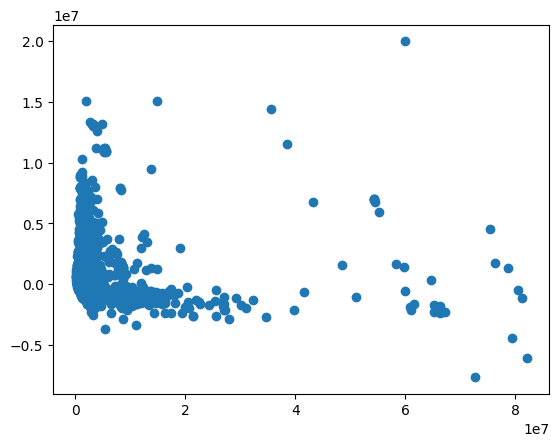

In [93]:
import matplotlib.pyplot as plt
plt.scatter(y_pred1, residuals1)

In [94]:
from statsmodels.stats.diagnostic import het_white

white_test = het_white(ols_model1.resid, ols_model1.model.exog)
labels = ['Test Statistic', 'p-value', 'F-Statistic', 'F p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 1619.681136554015, 'p-value': 0.0, 'F-Statistic': 558.8117120168583, 'F p-value': 0.0}


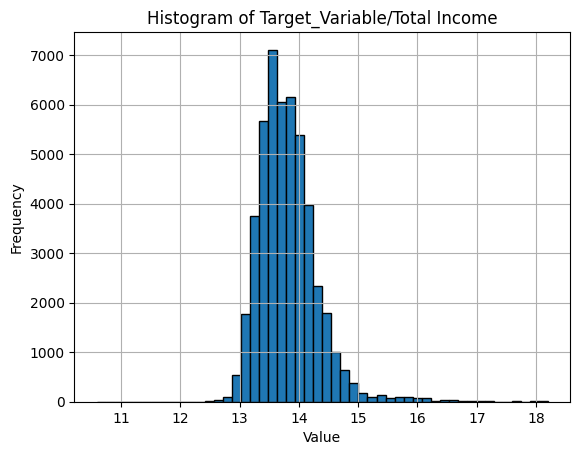

In [95]:
plt.hist(np.log(train_df['Target_Variable/Total Income']), bins=50, edgecolor='black')
plt.title("Histogram of Target_Variable/Total Income")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# fitting model after dropping farmerid and zipcode

In [96]:
# Separate target and FarmerID
x2 = train_df.drop(columns=['Target_Variable/Total Income', 'FarmerID','Zipcode','Rabi_Ambient_temperature_AVG_min', 'Rabi_Ambient_temperature_AVG_max','reservoir, river, riverbank', 'river, water, wetland'])
y2 = train_df['Target_Variable/Total Income']
farmer_ids = train_df[['FarmerID','Zipcode']]  # keep it separately

In [97]:

# --- Add constant term for intercept ---
x_train2 = sm.add_constant(x2)

# --- Fit OLS model ---
ols_model2 = sm.OLS(y2, x_train2).fit()

# --- View summary ---
print(ols_model2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Target_Variable/Total Income   R-squared:                       0.897
Model:                                      OLS   Adj. R-squared:                  0.897
Method:                           Least Squares   F-statistic:                     6467.
Date:                          Thu, 31 Jul 2025   Prob (F-statistic):               0.00
Time:                                  17:34:16   Log-Likelihood:            -7.0786e+05
No. Observations:                         47729   AIC:                         1.416e+06
Df Residuals:                             47664   BIC:                         1.416e+06
Df Model:                                    64                                         
Covariance Type:                      nonrobust                                         
                                                                                   coef    std err          t 

# cross validation result

In [100]:
from sklearn.model_selection import KFold


# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mape_list = []

for train_index, val_index in kf.split(x_train2):
    x_train2_cv, x_val2_cv = x_train2.iloc[train_index], x_train2.iloc[val_index]
    y_train_cv, y_val_cv = y2.iloc[train_index], y2.iloc[val_index]
    
    model_cv = sm.OLS(y_train_cv, x_train2_cv).fit()
    y_pred_cv = model_cv.predict(x_val2_cv)
    
    mape = mean_absolute_percentage_error(y_val_cv, y_pred_cv)
    mape_list.append(mape)

print("MAPE for each fold:", mape_list)
print("Average CV MAPE:", np.mean(mape_list))


MAPE for each fold: [0.31236694322088693, 0.324106038200589, 0.3157005034514832, 0.3192880084851274, 0.3272417491217947]
Average CV MAPE: 0.3197406484959762


# fitting Random Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [102]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(x_train2,y2)
rf_predict = rf_model.predict(x_train2)

# Random Forest Results

In [103]:
print("Train MAPE:", mean_absolute_percentage_error(y2, rf_predict))
print("Train R² Score:", r2_score(y2, rf_predict))

Train MAPE: 0.08316778011675563
Train R² Score: 0.9913212579242502


# testing phase starts here

In [104]:
test_df = pd.read_excel('/kaggle/input/ltdataset/LTF Challenge data with dictionary.xlsx', sheet_name = 'TestData')

In [105]:
test_df.isnull().sum()

FarmerID                                                                         0
State                                                                            0
REGION                                                                           0
SEX                                                                              0
CITY                                                                             0
                                                                              ... 
 Village score based on socio-economic parameters (0 to 100)                     0
 Village category based on socio-economic parameters (Good, Average, Poor)       0
 Land Holding Index source (Total Agri Area/ no of people)                       0
 Road density (Km/ SqKm)                                                         0
Target_Variable/Total Income                                                  9986
Length: 105, dtype: int64

In [106]:
num_cols_test = ((test_df.select_dtypes(include = [float,int])).columns).to_list()
cat_cols_test = ((test_df.select_dtypes(include = [object])).columns).to_list()
for i in num_cols_test:
    if test_df[i].isnull().sum() > 0 :
        print(f"{i}: {test_df[i].isnull().sum()}")

Avg_Disbursement_Amount_Bureau: 4262
Total_Land_For_Agriculture: 16
Perc_of_house_with_6plus_room: 33
Women_15_19_Mothers_or_Pregnant_at_time_of_survey: 33
perc_of_pop_living_in_hh_electricity: 33
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms: 33
mat_roof_Metal_GI_Asbestos_sheets: 33
perc_of_Wall_material_with_Burnt_brick: 33
Households_with_improved_Sanitation_Facility: 33
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k: 33
Target_Variable/Total Income: 9986


In [107]:
# List of columns with missing values
columns_to_check_test = [
    'Perc_of_house_with_6plus_room',
    'Total_Land_For_Agriculture',
    'Women_15_19_Mothers_or_Pregnant_at_time_of_survey',
    'perc_of_pop_living_in_hh_electricity',
    'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
    'mat_roof_Metal_GI_Asbestos_sheets',
    'perc_of_Wall_material_with_Burnt_brick',
    'Households_with_improved_Sanitation_Facility',
    'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'
]

# Drop rows from df_cat where any of these columns have missing values
test_df[columns_to_check_test] = test_df[columns_to_check_test].fillna(0)

In [108]:
for i in cat_cols_test:
    if test_df[i].isnull().sum() > 0 :
        print(f"{i}: {test_df[i].isnull().sum()}")

Location: 3569
Address type: 3569
Ownership: 3569


# trying to impute latitude & longitude according to district groupby

In [109]:
test_df[['Latitude','Longitude']] = test_df['Location'].str.split(',', expand = True).astype(float)
test_df['Latitude'].isnull().sum(), test_df['Longitude'].isnull().sum()

# Merge median coordinates back into the original DataFrame
test_df = test_df.merge(district_coords, on='DISTRICT', how='left', suffixes=('', '_median'))

# Fill missing values
test_df['Latitude'] = test_df['Latitude'].fillna(test_df['Latitude_median'])
test_df['Longitude'] = test_df['Longitude'].fillna(test_df['Longitude_median'])

# Drop temporary columns
test_df.drop(['Latitude_median', 'Longitude_median'], axis=1, inplace=True)


test_df['Latitude'] = test_df['Latitude'].ffill()
test_df['Longitude'] = test_df['Longitude'].ffill()

In [110]:
test_df['Longitude'].isnull().sum(), test_df['Latitude'].isnull().sum()

(0, 0)

In [111]:
test_df[['K022-Ambient temperature min','K022-Ambient temperature max']] = test_df['K022-Ambient temperature (min & max)'].str.split('/', expand = True).astype(float)
test_df[['R022-Ambient temperature min','R022-Ambient temperature max']] = test_df['R022-Ambient temperature (min & max)'].str.split('/', expand = True).astype(float)
test_df[['K021-Ambient temperature min','K021-Ambient temperature max']] = test_df['K021-Ambient temperature (min & max)'].str.split('/', expand = True).astype(float)
test_df[['R021-Ambient temperature min','R021-Ambient temperature max']] = test_df['R021-Ambient temperature (min & max)'].str.split('/', expand = True).astype(float)
test_df[['R020-Ambient temperature min','R020-Ambient temperature max']] = test_df['R020-Ambient temperature (min & max)'].str.split('/', expand = True).astype(float)
test_df.drop(columns = ['K022-Ambient temperature (min & max)','R022-Ambient temperature (min & max)','K021-Ambient temperature (min & max)','R021-Ambient temperature (min & max)','R020-Ambient temperature (min & max)'], inplace = True)

In [112]:
test_df['Khariff_Ambient_temperature_AVG_min'] = (test_df['K022-Ambient temperature min'] + test_df['K021-Ambient temperature min'])*0.5
test_df['Rabi_Ambient_temperature_AVG_min'] = (test_df['R021-Ambient temperature min'] + test_df['R022-Ambient temperature min'] + test_df['R020-Ambient temperature min']) * 0.33 
test_df['Khariff_Ambient_temperature_AVG_max'] = (test_df['K022-Ambient temperature max'] + test_df['K021-Ambient temperature max']) * 0.5
test_df['Rabi_Ambient_temperature_AVG_max'] = (test_df['R021-Ambient temperature max'] + test_df['R022-Ambient temperature max'] + test_df['R020-Ambient temperature max'] ) * 0.33

In [113]:
# Step 1: Parse safely and remove non-string items
def safe_parse(x):
    if pd.isna(x) or x in ['None', 'nan']:
        return []
    try:
        # Convert string representation of list into actual list
        items = eval(x)
        # Keep only string items, ignore None or numbers
        return [str(i) for i in items if isinstance(i, str)]
    except:
        return []

# Step 2: Apply to the column
test_df['WaterBodiesParsed'] = test_df['Rabi Seasons Type of water bodies in hectares 2020'].apply(safe_parse)

# Step 3: Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encoded = pd.DataFrame(
    mlb.fit_transform(test_df['WaterBodiesParsed']),
    columns=mlb.classes_,
    index=test_df.index
)

# Step 4: Concatenate with original DataFrame
test_df = pd.concat([test_df, encoded], axis=1)


In [114]:
# Define the mapping based on fertility (higher number => more fertile, no 0)
soil_fertility_map = {
    'Alluvial-derived Soils (with saline phases)': 5,
    'Coastal and Deltaic Alluvium derived Soils': 5,
    'Deep Black soils (with shallow and medium Black Soils as inclusion)': 4,
    'Shallow Black Soils (with medium and deep Black Soils as  inclusion)': 4,
    'Mixed Red and Black Soils': 3,
    'Red loamy Soils': 2,
    'Red and lateritic Soils': 2,
    'Desert (saline) Soils': 1
}

# Apply the mapping
test_df['soil_fertility_label'] = test_df['Kharif Seasons  Type of soil in 2022'].map(soil_fertility_map)

In [115]:
# Mapping dictionary
agro_zone_fertility_map = {
    'WESTERN GHATS AND COASTAL PLAIN  HOT HUMID-PERHUMID ECO-REGION': 6,
    'EASTERN PLATEAU (CHHOTANAGPUR) AND EASTERN GHATS  HOT SUBHUMID ECO-REGION': 5,
    'EASTERN COASTAL PLAIN  HOT SUBHUMID TO SEMI-ARID EGO-REGION': 5,
    'CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND)  HOT SUBHUMID (DRY) ECO-REGION': 4,
    'NORTHERN PLAIN (AND CENTRAL HIGHLANDS) INCLUDING ARAVALLIS  HOT SEMI-ARID EGO-REGION': 3,
    'DECCAN PLATU  HOT SEMI-ARID ECO-REGION': 3,
    'DECCAN PLATEAU  (TELANGANA) AND EASTERN GHATS  HOT SEMI ARID ECO-REGION': 3,
    'EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCAN (K ARNATAKA) PLATEAU  HOT SEMI-ARID ECO-REGION': 3,
    'CENTRAL HIGHLANDS ( MALWA )  GUJARAT PLAIN AND KATHIAWAR PENINSULA  SEMI-ARID ECO-REGION': 3,
    'KARNATAKA PLATEAU (RAYALSEEMA AS INCLUSION)': 2,
    'WESTERN PLAIN  KACHCHH AND PART OF KATHIAWAR PENINSULA, HOT ARID ECO-REGION': 1,
    'NORTHERN PLAIN  HOT SUBHUMID (DRY) ECO-REGION': 4
}

# Apply encoding
test_df['agro_ecozone_encoded'] = test_df['Kharif Seasons  Agro Ecological Sub Zone in 2022'].map(agro_zone_fertility_map)


In [116]:
test_df['Address type'] = test_df['Address type'].fillna('Missing')
test_df['Ownership'] = test_df['Ownership'].fillna('Missing')

address_type = {
    'Current Address': 1,
    'Permanent Address': 2,
    'Both Addresses': 3,
    'Missing': 0   # lowest priority or unknown
}

ownership= {
    'Rented': 1,
    'Parental': 2,
    'Owned': 3,
    'Missing': 0   # lowest confidence
}

test_df['Address type_encoded'] = test_df['Address type'].map(address_type)
test_df['Ownership_encoded'] = test_df['Ownership'].map(ownership)

In [117]:
test_df.drop(columns = ['State','REGION','CITY','DISTRICT','VILLAGE','K022-Nearest Mandi Name'], inplace = True)

In [118]:
test_df['SEX'].value_counts()

SEX
M    9027
F     957
O       2
Name: count, dtype: int64

In [119]:
test_df = test_df[test_df['SEX'] != 'O']

In [120]:
sex_category_encoding = {
                'F' : 1.32,
                'M' : 1.21
}
test_df['SEX_category_encoded'] = test_df['SEX'].map(sex_category_encoding)


marital_status_encoding = {
                 'M' : 2,
                 'F' : 1
}
test_df['MARITAL_STATUS_encoded'] = test_df['MARITAL_STATUS'].map(marital_status_encoding)
test_df['MARITAL_STATUS_encoded'].fillna(1, inplace = True)

/tmp/ipykernel_82/2477686839.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['MARITAL_STATUS_encoded'].fillna(1, inplace = True)


In [121]:
test_df['K022-Village category based on Agri parameters (Good, Average, Poor)'].value_counts()

K022-Village category based on Agri parameters (Good, Average, Poor)
Poor       7601
Average    2383
Name: count, dtype: int64

In [122]:
test_df['R022-Village category based on Agri parameters (Good, Average, Poor)'].value_counts()

R022-Village category based on Agri parameters (Good, Average, Poor)
Poor       8593
Average    1391
Name: count, dtype: int64

In [123]:

K022_Village_category_based_on_Agri_encoding = {
                'Poor' : 1,
                'Average' : 2
}
test_df['K022_Village_category_based_on_Agri_parameters_(Good, Average, Poor)_encoded'] = test_df['K022-Village category based on Agri parameters (Good, Average, Poor)'].map(K022_Village_category_based_on_Agri_encoding)

R022_Village_category_based_on_Agri_encoding = {
                'Poor' : 1,
                'Average' : 2
}
test_df['R022_Village_category_based_on_Agri_parameters_(Good, Average, Poor)_encoded'] = test_df['R022-Village category based on Agri parameters (Good, Average, Poor)'].map(R022_Village_category_based_on_Agri_encoding)

In [124]:
test_df['Avg_Disbursement_Amount_Bureau'].fillna(0, inplace = True)

/tmp/ipykernel_82/2067641385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Avg_Disbursement_Amount_Bureau'].fillna(0, inplace = True)


In [125]:
test_df.drop(columns = ['Location','SEX','MARITAL_STATUS','Address type','Ownership','K022-Village category based on Agri parameters (Good, Average, Poor)','K022-Village category based on socio-economic parameters (Good, Average, Poor)','R022-Village category based on Agri parameters (Good, Average, Poor)','Kharif Seasons  Type of soil in 2022','Kharif Seasons  Type of water bodies in hectares 2022','Kharif Seasons  Agro Ecological Sub Zone in 2022','Rabi Seasons Type of soil in 2022','Rabi Seasons Type of water bodies in hectares 2022','Rabi Seasons Agro Ecological Sub Zone in 2022','Rabi Seasons Type of soil in 2021','Rabi Seasons Type of water bodies in hectares 2021','Rabi Seasons Agro Ecological Sub Zone in 2021','Kharif Seasons Type of soil in 2021','Kharif Seasons Type of water bodies in hectares 2021','Kharif Seasons Agro Ecological Sub Zone in 2021','Kharif Seasons Type of soil in 2020','Kharif Seasons Type of water bodies in hectares 2020','Kharif Seasons Agro Ecological Sub Zone in 2020','Rabi Seasons Type of soil in 2020','Rabi Seasons Type of water bodies in hectares 2020','Rabi Seasons Agro Ecological Sub Zone in 2020',' Village category based on socio-economic parameters (Good, Average, Poor)','WaterBodiesParsed'], inplace = True)

In [126]:
test_df.drop(columns = columns_to_drop_based_on_high_vif, inplace = True)

In [127]:
test_df.drop(columns = ['R022-Ambient temperature max',
  'K022-Ambient temperature min',
  'K021-Ambient temperature max',
  'R021-Ambient temperature min',
  'K021-Ambient temperature min',
  'R020-Ambient temperature max',
  'K022-Ambient temperature max',
  'R022-Ambient temperature min',
  'R021-Ambient temperature max',
  'R020-Ambient temperature min'], inplace = True)

In [128]:
test_df.drop(columns = ['Khariff_Ambient_temperature_AVG_min',
  'Rabi Seasons Agricultural performance in 2022',
  'R021-Seasonal Average Rainfall (mm)',
  'Khariff_Ambient_temperature_AVG_max'], inplace = True)


In [129]:
test_df.drop(columns = ['FarmerID', 'Zipcode','Target_Variable/Total Income','Rabi_Ambient_temperature_AVG_min', 'Rabi_Ambient_temperature_AVG_max'] ,inplace = True)

In [130]:
test_df = sm.add_constant(test_df)

In [131]:
x_train2.shape, test_df.shape

((47729, 65), (9984, 65))

In [132]:
test_pred = ols_model2.predict(test_df)

In [133]:
test_pred

0       1.115596e+06
1       8.863327e+05
2       8.474720e+05
3       1.371102e+06
4       1.129742e+06
            ...     
9981    7.293311e+05
9982    7.010260e+05
9983    5.668581e+05
9984    5.088587e+05
9985    4.860111e+05
Length: 9984, dtype: float64

In [134]:
test_df2 = pd.read_excel('/kaggle/input/ltdataset/LTF Challenge data with dictionary.xlsx', sheet_name = 'TestData')

In [135]:
test_res=pd.DataFrame()
test_res["FarmerID"]=test_df2["FarmerID"]
test_res["Target_Variable/Total Income"]=pd.DataFrame(test_pred)


In [136]:
test_res.head()

,FarmerID,Target_Variable/Total Income
0,576972022499073,1.115596e+06
1,979235081831136,8.863327e+05
2,176490610549774,8.474720e+05
3,977021407171384,1.371102e+06
4,1334154133262320,1.129742e+06


In [137]:
test_res.to_excel("Kanyarashi_Results.xlsx")